<a href="https://colab.research.google.com/github/shanzayamjad01/python-tasks/blob/main/airline_review_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Review Exploratory Data Analysis

Customer perception is a critical component of any business operating in our world today. For a business to remain successful, it must be able to understand and adapt to the changing needs of its customer base. This project is based on the Airline Customer Holiday Booking dataset found on Kaggle. For my analysis, I chose to work with the 'AirlineScrappedReview' file found within this dataset because it offered me the chance to solve this complex challenge.

## About the Data

The file contains approximately 3,500 records of customer reviews. With each review, customers also provided a 1-10 rating for their experience. Each customer is broken down into classifications based on the type of travelling they did and their seating class. Reviews are marked as verified or not verified and there is additional raw information provided such as the route of the flight and the month of travel.

[Click here to view the dataset](https://www.kaggle.com/code/manishkumar7432698/airline-passanger-choice-eda)

## Project Goals

The main goal for this project is to explore the customer review data provided in this dataset to understand how customers perceive British Airways and to identify areas of focus that British Airways could work to improve customer relations.


## Loading the Data

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

plt.style.use('ggplot')

# Loading dataset
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/AirlineScrappedReview.csv')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Discovery

Once the data was loaded from the source dataset, I began my analysis by reviewing the structure of the dataset and the summary statistics. Below are some of the insights I gained from this stage of the analysis.

1. A small portion of records have a null Rating.
3. A large number of Review Verifications are null.
4. There are a lot of records appearing in wrong columns.

In [ ]:
# Reviewing information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [ ]:
# Viewing first 30 rows of data
df.head(30)

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,June 2023,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,March 2023,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,June 2023,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
5,M King,June 2023,London to Washington,1.0,Trip Verified,Communication is terrible,Absolutely horrible airline. Communication is ...,Couple Leisure,Economy Class
6,C Dean,Amsterdam to London,Business Class,1.0,Trip Verified,delays and cancellations,Having experienced delays and cancellations de...,A350,Business
7,Richard Hodges,London Heathrow to Kalamata,Economy Class,7.0,Trip Verified,Economy class seating was truly dreadful,Travelled to Heathrow to Kalamata and return j...,Boeing 737,Couple Leisure
8,Carol Willmore,June 2023,London to Funchal,1.0,Not Verified,flight failed at every level,This flight failed at every level. We were del...,Couple Leisure,Economy Class
9,Nadine Kohler,June 2023,Marseille to Seattle via London Heathrow,1.0,Not Verified,BA refuses to make it right,Beware of British Airways and their marketing ...,Family Leisure,Economy Class


In [ ]:
# Checking summary statistics
df.describe()

,Rating
count,3575.000000
mean,4.790490
std,3.170323
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


## Data Cleaning

With a firm understanding of the types of data within my dataset, I began the cleaning process by identifying a list of issues within the data structure. To resolve these issues, I made a plan to clean the data and broke the process down into a checklist of steps listed below.

1. Remove duplicate rows from the dataset.
2. Omit any records with a null Ratings.
    - I only want to analyze reviews with a Rating score provided.
3. Set any null Review Verifications to 'Not Verified'.
    - This will allow me to still consider these reviews under the assumption they have not been verified.
4. Identify proper categories for the Traveller_type and Class columns in order to clean each column.
5. Clean Flying_month and Route columns.

### Key Challenges Faced in this Process

During the data cleaning process, I faced numerous challenges. The biggest challenge was the sheer amount of data that appeared in the wrong columns with no clear pattern or reason for incorrect values to appear where they did. I had to deploy a diverse array of cleaning techniques to clean each column with constant checks as I performed each step. This process took longer than any other step in the project.

The next major challenge I faced was with interpreting the route data. I knew there was valuable data that could be useful for analysis within this column but since the column was an aggregation of starting city, ending city, and layover routes I had to craft a process for identifying these aggregated values and breaking them into separate columns. I was able to overcome this challenge by recognizing a common pattern for each listing and parsing the data appropriately.

#### 1. Removing Duplicates

In [ ]:
# Removing duplicate records
df.drop_duplicates()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,June 2023,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,March 2023,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,June 2023,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


#### 2. Omitting null Ratings

In [ ]:
# Creating a function to perform quicker checks for null values within a column
def null_check(value):
    return df[df[value].isnull()]

# Reviewing all rows with a null Rating for review before removal
null_check('Rating')

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
3012,Ray Desjardins,NaN,NaN,NaN,NaN,British Airways customer review,Cabin crew polite unfortunately BA ran out of ...,Economy Class,no
3134,Neil Balter,NaN,NaN,NaN,NaN,British Airways customer review,Phoenix to London - outbound a wonderful and e...,First Class,no
3152,D Thomas,NaN,NaN,NaN,NaN,British Airways customer review,On past experience I chose BA for our long hau...,Economy Class,no
3391,J Whittle,NaN,NaN,NaN,NaN,British Airways customer review,LHR-CPH-LHR Business Class. This is a joke. Sc...,Business Class,no
3424,Jackie Craig,NaN,NaN,NaN,NaN,British Airways customer review,I flew with British Airways with my mother fro...,Economy Class,no


In [ ]:
# Dropping any rows with a null Rating
df.dropna(subset=['Rating'], inplace=True)

# Checking to confirm null ratings were removed
null_check('Rating')

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class


In [ ]:
# Converting Rating from Float to Int type
df['Rating'] = df['Rating'].astype(int)

# Confirming data type has been updated to Int
df['Rating'].dtype

dtype('int64')

#### 3. Updating null Review Verifications

In [ ]:
# Creating a function to check unique values in a column
def unique(value):
    return df[value].unique()

In [ ]:
# Setting null values in the Verified column to 'Not Verified'
df['Verified'].fillna("Not Verified", inplace = True)

# Checking to confirm the null values were removed
unique('Verified')

array(['Trip Verified', 'Not Verified'], dtype=object)

In [ ]:
# Checking the counts of Verified and Not Verified reviews
df['Verified'].value_counts()

# Value Counts does not list null values, which is why I performed this step separately

Verified
Not Verified     2508
Trip Verified    1067
Name: count, dtype: int64

#### 4. Categorizing & Cleaning Class and Traveller Type Columns

In [ ]:
# Checking unique values in Traveller_type column
unique('Traveller_type')

array(['Solo Leisure', 'Couple Leisure', 'A321 neo', 'Embraer 190',
       'A350', 'Boeing 737', 'Family Leisure', 'Business', 'Boeing 787',
       'Boeing 777', 'Boeing 777-300', 'A320', 'A320 Finnair', 'A319',
       'Boeing 787-9', 'Dreamliner', 'Boeing 777-200',
       'Boeing 787 / A320', 'A321', 'A321Neo', 'A380',
       'Boeing 777 / A320', 'A321neo', 'Boeing 777-300ER', 'Boeing 787-8',
       'A320, A380', 'A350-1000', 'Boeing 787-10', 'A320neo', 'A320-200',
       'Business Class', 'A320, Boeing 787', 'A321 Neo', 'Boeing 737 800',
       'A320 / Boeing 777', 'Embraer', 'Boeing 777-200ER',
       'Boeing 787-900', 'A321-neo', 'A322', 'Boeing 737-800', 'A320 Neo',
       'A320NEO', 'A330', 'A230', 'A321NEO', 'Boeing 747', 'Embraer 195',
       'Boeing 747-400', 'A380-800', 'Boeing 777-200 / 747-400',
       'Boeing 777 - 200', 'Boeing 787-9, A320-200', 'EMB190',
       'A319 / Boeing777', 'A340-300, A320', 'A321-200', 'B777-200',
       'A320 neo', 'A319 / Boeing 789', 'Boeing 7

In [ ]:
'''
There are a lot of unique values returned in the Traveller_type column. This is making it difficult to identify the
correct categorical values for this column. At a glance, a lot of unique values appear to contain the word 'boeing'
or contain a model number. To narrow down the unique values I will remove any record that meets either condition.
'''

# Using regular expressions to remove any record containing the word 'boeing' or a number.
df.loc[df['Traveller_type'].str.lower().str.contains('boeing|\d', na=False, case=False),
       'Traveller_type'] = np.nan

# Checking remaining unique values in Traveller_type column
unique('Traveller_type')

array(['Solo Leisure', 'Couple Leisure', nan, 'Family Leisure',
       'Business', 'Dreamliner', 'Business Class', 'Embraer',
       'First Class', 'Various', 'Economy Class', 'Premium Economy', 'no'],
      dtype=object)

In [ ]:
# Based on the output above, I was able to identify the appropriate types of traveller.

# Storing traveller types in a set
traveller_type_set = {'Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business', 'Various'}

'''
Creating a function that will check all columns for records found in the traveller type set, return the value if found,
    and set the record to null.
I will use the apply method to create a new column based on returned values.
'''

def clean_column(row, categories_set):
    for col in df.columns:
        value = row[col]
        if value in categories_set:
            df[col] = df[col].replace(value, np.nan)
            return value
    return np.nan

# Creating a new column called 'Traveller_Type_Cleaned' and using the apply method to populate the values
df['Traveller_Type_Cleaned'] = df.apply(clean_column, axis=1, categories_set=traveller_type_set)

# Checking unique values in the 'Traveller_Type_Cleaned' column
unique('Traveller_Type_Cleaned')

array(['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business',
       nan, 'Various'], dtype=object)

In [ ]:
# Checking the remaining values in the original 'Traveller_type' column.
unique('Traveller_type')

array([nan, 'Dreamliner', 'Business Class', 'Embraer', 'First Class',
       'Economy Class', 'Premium Economy', 'no'], dtype=object)

In [ ]:
'''
There are some values remaining in 'Traveller_type' that belong to the Class column so I will keep this column for now

I will clean the Class column using a similar approach to above
'''

# Checking unique values in the Class column
unique('Class')

array(['Economy Class', 'Business Class', nan, 'Premium Economy',
       'London to Malaga', 'First Class', 'LHR to ORD',
       'Los Angeles to London to Paris to Rome ', 'no', 'yes'],
      dtype=object)

In [ ]:
# I identified several records that belong to the 'Route' column in the above output.

# Creating a mask to filter on the identified 'Route' values using regular expressions
mask = df['Class'].str.contains('London|LHR', na=False)

# Reviewing the rows before I modify the values
df[mask]

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Traveller_Type_Cleaned
224,Mark Robinson,no,July 2022,1,Trip Verified,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,London to Malaga,NaN
1748,Simon Warner,no,January 2017,5,Not Verified,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,LHR to ORD,NaN
2794,Tom Moore,no,May 2015,1,Not Verified,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,NaN,Los Angeles to London to Paris to Rome,Solo Leisure


In [ ]:
'''
The above output shows date values that belong to the 'Flying_month' column are present in the Route column.
    I will need to move the 'Flying_month' values to the correct column first

Since the 'no' values don't appear to make sense for any column in this dataset, I will write over these values
'''

# Moving the date values to the Flying Month column based on the mask filter
df.loc[mask, 'Flying_month'] = df.loc[mask, 'Route']

# Moving the Class values to the Route column based on the mask filter
df.loc[mask, 'Route'] = df.loc[mask, 'Class']

# Setting the Class column to null based on the mask filter
df.loc[mask, 'Class'] = np.nan

# Checking to make sure all values updated correctly
df[mask]

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Traveller_Type_Cleaned
224,Mark Robinson,July 2022,London to Malaga,1,Trip Verified,become an absolute nightmare,Over 1 week ago I cancelled 2 Club Europe flig...,Business Class,NaN,NaN
1748,Simon Warner,January 2017,LHR to ORD,5,Not Verified,cost saving is clearly evident,Verified Review London Heathrow to Chicago i...,First Class,NaN,NaN
2794,Tom Moore,May 2015,Los Angeles to London to Paris to Rome,1,Not Verified,British Airways customer review,Overall good experience. BA owns Vueling/Iberi...,NaN,NaN,Solo Leisure


In [ ]:
# Checking the remaining unique values in the Class column
unique('Class')

array(['Economy Class', 'Business Class', nan, 'Premium Economy',
       'First Class', 'no', 'yes'], dtype=object)

In [ ]:
# Based on the output above, I was able to identify the correct class categories

# Storing the Class categories in a set
class_categories_set = {'Economy Class', 'Business Class', 'Premium Economy', 'First Class'}

# Applying my clean_column function to create a new column called 'Class_Cleaned'
df['Class_Cleaned'] = df.apply(clean_column, axis=1, categories_set=class_categories_set)

# Checking the unique values in the 'Class_Cleaned' column
unique('Class_Cleaned')

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class', nan], dtype=object)

In [ ]:
# Double checking remaining values in 'Class' column
unique('Class')

array([nan, 'no', 'yes'], dtype=object)

In [ ]:
# Removing 'Class' column
df = df.drop('Class', axis=1)

In [ ]:
# Now that the 'Class_Cleaned' column has been created, the 'Traveller_type' column shouldn't have any remaining useful data

# Double checking remaining values in 'Traveller_type' column
unique('Traveller_type')

array([nan, 'Dreamliner', 'Embraer', 'no'], dtype=object)

In [ ]:
# Removing Traveller Type column
df = df.drop('Traveller_type', axis=1)

In [ ]:
# Checking to make sure Traveller Type and Class columns were removed
df.head(0)

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_Type_Cleaned,Class_Cleaned


In [ ]:
# Renaming 'Traveller_Type_Cleaned' column to 'Traveller_Type' and 'Class_Cleaned' column to 'Class'
df = df.rename(columns={'Traveller_Type_Cleaned': 'Traveller_Type', 'Class_Cleaned': 'Class'})

# Verifying the change took effect
df.head(0)

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class


In [ ]:
# Checking table structure now that 'Class' and 'Traveller_Type' are cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3575 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Passanger_Name  3574 non-null   object
 1   Flying_month    2815 non-null   object
 2   Route           958 non-null    object
 3   Rating          3575 non-null   int64 
 4   Verified        3575 non-null   object
 5   Review_title    3575 non-null   object
 6   Review_content  3575 non-null   object
 7   Traveller_Type  2815 non-null   object
 8   Class           3573 non-null   object
dtypes: int64(1), object(8)
memory usage: 279.3+ KB


#### 5. Cleaning Flying Month and Route Columns

In [ ]:
# Creating a mask to check 'Flying_month' column for records matching a datetime format
mask = pd.to_datetime(df['Flying_month'], errors='coerce').notna()

# Creating a dataframe with all records that do not match a datetime format
df_not_date = df[~mask]

# Filtering the non-date format dataframe where 'Route' is null
df_null_route = df_not_date[df_not_date['Route'].isna()]

# Updating the null 'Route's in the original dataframe to the non-date values from the 'Flying_month' column
df.loc[df_null_route.index, 'Route'] = df_null_route['Flying_month']

# Setting non-date 'Flying_month' values to null
df.loc[df_null_route.index, 'Flying_month'] = np.nan

# Checking remaining unique values in 'Flying_month' column in the 'df_not_date' dataframe
df_not_date['Flying_month'].unique()

/tmp/ipykernel_20/2700654331.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mask = pd.to_datetime(df['Flying_month'], errors='coerce').notna()


array(['Heathrow to Bodrum', 'London City to Ibiza',
       'Amsterdam to London', ..., 'London-Vancouver return', 'LHR-ORD',
       'yes'], dtype=object)

In [ ]:
# Setting 'yes' and 'no' values to null in 'Flying_month' column. These values do not match any columns in the dataset
df['Flying_month'] = df['Flying_month'].replace('yes', np.nan)
df['Flying_month'] = df['Flying_month'].replace('no', np.nan)

In [ ]:
# Setting 'yes' and 'no' values to null in 'Flying_month' column. These values do not match any columns in the dataset
df['Route'] = df['Route'].replace('yes', np.nan)
df['Route'] = df['Route'].replace('no', np.nan)

In [ ]:
# Renaming 'Flying_month' column to 'Flying_Date' because year is also present in this column
df.rename(columns={'Flying_month': 'Flying_Date'}, inplace=True)

In [ ]:
# Checking the amount of nulls in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3575 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Passanger_Name  3574 non-null   object
 1   Flying_Date     950 non-null    object
 2   Route           2814 non-null   object
 3   Rating          3575 non-null   int64 
 4   Verified        3575 non-null   object
 5   Review_title    3575 non-null   object
 6   Review_content  3575 non-null   object
 7   Traveller_Type  2815 non-null   object
 8   Class           3573 non-null   object
dtypes: int64(1), object(8)
memory usage: 408.3+ KB


In [ ]:
# Using a mask to check if any date values are in the 'Route' column
mask = pd.to_datetime(df['Route'], errors='coerce').notna()
df[mask]

/tmp/ipykernel_20/1216180918.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mask = pd.to_datetime(df['Route'], errors='coerce').notna()


,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class
42,Nicholas Felty,NaN,May 2023,1,Trip Verified,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class
234,Paul Mayer,NaN,June 2022,1,Not Verified,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class
419,barbara ciereszko,NaN,July 2021,1,Not Verified,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class
2552,Steve Purkis,NaN,February 2015,1,Not Verified,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class
2567,Travis Rodgers,NaN,September 2015,5,Not Verified,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class


In [ ]:
# Based on the above output, there were a few date values found in the 'Route' column. 'Flying_Date' is null in this range

# Updating 'Flying_Date' records to the 'Route' values based on the mask filter
df.loc[mask, 'Flying_Date'] = df.loc[mask, 'Route']

# Setting 'Route' records to null based on the mask filter
df.loc[mask, 'Route'] = np.nan

# Confirming the changes are correct
df[mask]

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class
42,Nicholas Felty,May 2023,NaN,1,Trip Verified,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class
234,Paul Mayer,June 2022,NaN,1,Not Verified,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class
419,barbara ciereszko,July 2021,NaN,1,Not Verified,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class
2552,Steve Purkis,February 2015,NaN,1,Not Verified,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class
2567,Travis Rodgers,September 2015,NaN,5,Not Verified,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class


In [ ]:
# Reviewing a sampling of the data to confirm if the data looks correct now
df.head(200)

,Passanger_Name,Flying_Date,Route,Rating,Verified,Review_title,Review_content,Traveller_Type,Class
0,Paige Boet,June 2023,New Orleans to London,1,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,March 2023,London to Amman,1,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,NaN,Heathrow to Bodrum,2,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class
3,Joel Burman,June 2023,Amman to London,4,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,NaN,London City to Ibiza,7,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class
...,...,...,...,...,...,...,...,...,...
195,Elizabeth Vaughan,September 2022,Sydney to London via Singapore,4,Not Verified,Should be more snacks on board,Good flight apart from my seat fabric was comi...,Solo Leisure,Economy Class
196,S Hearne,NaN,London to Lisbon,5,Trip Verified,Crew were friendly,Flight was 1 hour late leaving gate. Crew were...,Couple Leisure,Economy Class
197,Shahid Habib,September 2022,London to Istanbul,1,Trip Verified,very short leg space,London to Istanbul. British Airways Business C...,Business,Business Class
198,Delphi Haigh,September 2022,London to Manchester,2,Not Verified,staff were no help and frankly rude,London to Manchester. British Airways is proba...,Couple Leisure,Economy Class


In [ ]:
# Creating a column for 'Start_Location' by parsing 'Route' before the string ' to '
df['Start_Location'] = df['Route'].str.split(' to ').str[0]

# Creating a column for 'End_Location' by parsing 'Route' after the string ' to ' and removing 'via' and trailing characters
df['End_Location'] = df['Route'].str.split(' to ').str[1].str.replace(r'\s*via.*$', '', regex=True)

# Creating a column for 'Layover_Route' by parsing 'Route' after the string ' via '
df['Layover_Route'] = df['Route'].str.split(' via ').str[1]

# Printing the results
df[['Route', 'Start_Location', 'End_Location', 'Layover_Route']]

,Route,Start_Location,End_Location,Layover_Route
0,New Orleans to London,New Orleans,London,NaN
1,London to Amman,London,Amman,NaN
2,Heathrow to Bodrum,Heathrow,Bodrum,NaN
3,Amman to London,Amman,London,NaN
4,London City to Ibiza,London City,Ibiza,NaN
...,...,...,...,...
3575,NaN,NaN,NaN,NaN
3576,NaN,NaN,NaN,NaN
3577,NaN,NaN,NaN,NaN
3578,NaN,NaN,NaN,NaN


In [ ]:
# Data cleaning steps now complete

## Data Transformation

During my analysis of the route data, I noticed that while most of the records contained location names, other records contained airport codes instead of location names. I decided that the data could benefit from having a consistent format, so I opted to convert the airport codes to location names.

The challenge with this decision is the dataset did not provide a way to identify the corresponding location for each airport code.

To accomplish this task, I found a website that contained a table of airport codes and city names. I used Pandas built in web scrapping tool to extract this list into a dataframe and used indexing to update the values in my original dataframe.

My source for this task is nationsonline.org.
[Click here to view the source](https://www.nationsonline.org/oneworld/IATA_Codes/airport_code_list.htm)

In [ ]:
# Importing Libraries for web scrapping
import requests

# Connecting to website
url = 'https://www.nationsonline.org/oneworld/IATA_Codes/airport_code_list.htm'
hdr = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=hdr)

# Reading the html file to create a dataframe from each table
dfs = pd.read_html(response.text)

# Merging the dataframes created into one
airport_df = pd.concat(dfs, ignore_index=True)

# Assiging column names to the dataframe
airport_df.columns = ['City', 'Country', 'Airport_Code']

print('Complete')

Complete


In [ ]:
# Checking the airport dataframe
airport_df.head()

,City,Country,Airport_Code
0,A,A,A
1,Aarhus,Denmark,AAR
2,Abadan,Iran,ABD
3,Abeche,Chad,AEH
4,Aberdeen,United Kingdom,ABZ


In [ ]:
# Removing the first row and checking the output
airport_df = airport_df.drop(0, axis=0).reset_index(drop=True)
airport_df.head()

,City,Country,Airport_Code
0,Aarhus,Denmark,AAR
1,Abadan,Iran,ABD
2,Abeche,Chad,AEH
3,Aberdeen,United Kingdom,ABZ
4,Aberdeen (SD),USA,ABR


In [ ]:
# Creating a dictionary to store Airport Code as the key and City as the value
mapping_dict = airport_df.set_index('Airport_Code')['City'].to_dict()

# Using the dictionary to replace Airport Code to City in each parsed location
df['Start_Location'] = df['Start_Location'].replace(mapping_dict)
df['End_Location'] = df['End_Location'].replace(mapping_dict)
df['Layover_Route'] = df['Layover_Route'].replace(mapping_dict)

# Confirming the change took effect
df[['Route', 'Start_Location', 'End_Location', 'Layover_Route']]

,Route,Start_Location,End_Location,Layover_Route
0,New Orleans to London,New Orleans,London,NaN
1,London to Amman,London,Amman,NaN
2,Heathrow to Bodrum,Heathrow,Bodrum,NaN
3,Amman to London,Amman,London,NaN
4,London City to Ibiza,London City,Ibiza,NaN
...,...,...,...,...
3575,NaN,NaN,NaN,NaN
3576,NaN,NaN,NaN,NaN
3577,NaN,NaN,NaN,NaN
3578,NaN,NaN,NaN,NaN


In [ ]:
# Applying a mask to check if any null end cities exist where Start City is not null
mask = df[df['End_Location'].isnull() & df['Start_Location'].notnull()]

# Viewing the output for only specific columns
mask[['Route', 'Start_Location', 'End_Location', 'Layover_Route']]

,Route,Start_Location,End_Location,Layover_Route
103,London Singapore,London Singapore,NaN,NaN
1031,Edinburgh-Florence,Edinburgh-Florence,NaN,NaN
2359,YVR-LIS via LHR,YVR-LIS via LHR,NaN,London - Heathrow
2719,MAN-LHR,MAN-LHR,NaN,NaN
2731,LHR-BOM,LHR-BOM,NaN,NaN
2803,LHR-DEN,LHR-DEN,NaN,NaN
2804,ORD-LHR,ORD-LHR,NaN,NaN
2805,LHR-GLA,LHR-GLA,NaN,NaN
2806,GLA-LHR,GLA-LHR,NaN,NaN
2807,FRA-LHR,FRA-LHR,NaN,NaN


In [ ]:
# Removing ' return' from record 2811 for Route and Start City
df.loc[2811, 'Route'] = df.loc[2811, 'Route'].replace(' return', '').split()[0]
df.loc[2811, 'Start_Location'] = df.loc[2811, 'Start_Location'].replace(' return', '').split()[0]

print(df.loc[mask.index])

        Passanger_Name Flying_Date                Route  Rating  \
103     Janeks Volkovs         NaN    London Singapore        8   
1031         R Johnson   July 2018  Edinburgh-Florence       10   
2359     Alan Kurimura         NaN      YVR-LIS via LHR       6   
2719          A Gibson         NaN             MAN-LHR       10   
2731   Aadheer Warriar         NaN              LHR-BOM       3   
2803  James Williamson         NaN              LHR-DEN       8   
2804  James Williamson         NaN              ORD-LHR       9   
2805  James Williamson         NaN              LHR-GLA       9   
2806  James Williamson         NaN              GLA-LHR      10   
2807         Colin Pay         NaN             FRA-LHR        4   
2811            D Ross         NaN     London-Vancouver       7   
2812           J Brown         NaN              LHR-ORD       5   
2813    Kevin Barrance         NaN              BOM-LHR       3   
2814    Kevin Barrance         NaN              LHR-BOM       

In [ ]:
# Updating 'Start_Location' and 'End_Location' based on 'Route' where '-' exists
df.loc[mask.index, 'Start_Location'] = df.loc[mask.index, 'Route'].str.split('-').str[0]

# Removing ' via' and trailing text from 'End_Location'
df.loc[mask.index, 'End_Location'] = df.loc[mask.index, 'Route'].str.split('-').str[1].str.replace(r'\s*via.*$', '', regex=True)

# Checking results to confirm changes are correct
print(df.loc[mask.index])

        Passanger_Name Flying_Date                Route  Rating  \
103     Janeks Volkovs         NaN    London Singapore        8   
1031         R Johnson   July 2018  Edinburgh-Florence       10   
2359     Alan Kurimura         NaN      YVR-LIS via LHR       6   
2719          A Gibson         NaN             MAN-LHR       10   
2731   Aadheer Warriar         NaN              LHR-BOM       3   
2803  James Williamson         NaN              LHR-DEN       8   
2804  James Williamson         NaN              ORD-LHR       9   
2805  James Williamson         NaN              LHR-GLA       9   
2806  James Williamson         NaN              GLA-LHR      10   
2807         Colin Pay         NaN             FRA-LHR        4   
2811            D Ross         NaN     London-Vancouver       7   
2812           J Brown         NaN              LHR-ORD       5   
2813    Kevin Barrance         NaN              BOM-LHR       3   
2814    Kevin Barrance         NaN              LHR-BOM       

In [ ]:
# Cleaning an isolated issue in the above output at row 103

# Splitting 'Start_Location' and 'End_Location' where a space exist at row 103
df.loc[103, 'Start_Location'] = df.loc[103, 'Route'].split(' ')[0]
df.loc[103, 'End_Location'] = df.loc[103, 'Route'].split(' ')[1]

# Checking to confirm the record has been cleaned
df.iloc[103]

Passanger_Name                                       Janeks Volkovs
Flying_Date                                                     NaN
Route                                             London Singapore 
Rating                                                            8
Verified                                              Trip Verified
Review_title                             nice and professional crew
Review_content    Although it was a bit uncomfortable flight in ...
Traveller_Type                                         Solo Leisure
Class                                                 Economy Class
Start_Location                                               London
End_Location                                              Singapore
Layover_Route                                                   NaN
Name: 103, dtype: object

In [ ]:
# Applying a mask to check if any null 'End_Location's remain where 'Start_Location' is not null
mask = df[df['End_Location'].isnull() & df['Start_Location'].notnull()]

# Viewing the output for only specific columns
mask[['Route', 'Start_Location', 'End_Location', 'Layover_Route']]

,Route,Start_Location,End_Location,Layover_Route


In [ ]:
df[['Route', 'Start_Location', 'End_Location', 'Layover_Route']]

,Route,Start_Location,End_Location,Layover_Route
0,New Orleans to London,New Orleans,London,NaN
1,London to Amman,London,Amman,NaN
2,Heathrow to Bodrum,Heathrow,Bodrum,NaN
3,Amman to London,Amman,London,NaN
4,London City to Ibiza,London City,Ibiza,NaN
...,...,...,...,...
3575,NaN,NaN,NaN,NaN
3576,NaN,NaN,NaN,NaN
3577,NaN,NaN,NaN,NaN
3578,NaN,NaN,NaN,NaN


In [ ]:
# Addressing an isolated formatting issue with the 'Route' identified in row 18

# Updating 'Start_Location', 'End_Location', and 'Layover_Route'
df.loc[18, 'Start_Location'] = df.loc[18, 'Start_Location'].split(' via ')[1]
df.loc[18, 'End_Location'] = df.loc[18, 'Route'].split(' ')[0]
df.loc[18, 'Layover_Route'] = df.loc[18, 'Route'].split(' to ')[1]

# Checking to confirm the record has been cleaned
df.iloc[18]

Passanger_Name                                            M Johnson
Flying_Date                                              March 2023
Route                      Sydney via Singapore to London Heathrow 
Rating                                                            4
Verified                                              Trip Verified
Review_title                          All in all very disappointing
Review_content    My husband and I booked seats within our premi...
Traveller_Type                                       Couple Leisure
Class                                               Premium Economy
Start_Location                                            Singapore
End_Location                                                 Sydney
Layover_Route                                      London Heathrow 
Name: 18, dtype: object

In [ ]:
# Rerunning the location updates to update any remaining airport codes cleaned after the initial run
df['Start_Location'] = df['Start_Location'].replace(mapping_dict)
df['End_Location'] = df['End_Location'].replace(mapping_dict)
df['Layover_Route'] = df['Layover_Route'].replace(mapping_dict)

In [ ]:
df[['Route', 'Start_Location', 'End_Location', 'Layover_Route']]

,Route,Start_Location,End_Location,Layover_Route
0,New Orleans to London,New Orleans,London,NaN
1,London to Amman,London,Amman,NaN
2,Heathrow to Bodrum,Heathrow,Bodrum,NaN
3,Amman to London,Amman,London,NaN
4,London City to Ibiza,London City,Ibiza,NaN
...,...,...,...,...
3575,NaN,NaN,NaN,NaN
3576,NaN,NaN,NaN,NaN
3577,NaN,NaN,NaN,NaN
3578,NaN,NaN,NaN,NaN


In [ ]:
df['Start_Location'].value_counts()

Start_Location
London                                                 498
London - Heathrow                                      326
London Heathrow                                        194
Gatwick                                                100
London - Gatwick                                        73
                                                      ... 
Paphos                                                   1
Seville                                                  1
Houston, TX - George Bush Intercontinental Airport       1
Fuerteventura                                            1
Bombay (Mumbai) - Chhatrapati Shivaji International      1
Name: count, Length: 340, dtype: int64

In [ ]:
# Updating values containing London airports 'Heathrow' or 'Gatwick' to a consistent format
df.loc[df['Start_Location'].str.contains('Heathrow', case=False, na=False), 'Start_Location'] = 'London Heathrow'
df.loc[df['Start_Location'].str.contains('Gatwick', case=False, na=False), 'Start_Location'] = 'London Gatwick'


df.loc[df['End_Location'].str.contains('Heathrow', case=False, na=False), 'End_Location'] = 'London Heathrow'
df.loc[df['End_Location'].str.contains('Gatwick', case=False, na=False), 'End_Location'] = 'London Gatwick'

# Rechecking the 'Start_Location' value counts
df['Start_Location'].value_counts()

Start_Location
London Heathrow                                        583
London                                                 498
London Gatwick                                         205
Glasgow                                                 30
Manchester                                              29
                                                      ... 
Brindisi                                                 1
Paphos                                                   1
Seville                                                  1
Delhi                                                    1
Bombay (Mumbai) - Chhatrapati Shivaji International      1
Name: count, Length: 332, dtype: int64

In [ ]:
# Checking value counts for 'End_Location'
df['End_Location'].value_counts()

End_Location
London Heathrow       437
London                394
London Gatwick        145
Cape Town              30
Johannesburg           25
                     ... 
Casablanca              1
Fort Lauderdale         1
Helsinki                1
Delhi Airport           1
Sofia - Vrazhdebna      1
Name: count, Length: 411, dtype: int64

In [ ]:
# Checking value counts for 'Layover_Route'
df['Layover_Route'].value_counts()

Layover_Route
London                                           197
London - Heathrow                                151
Heathrow                                          31
London Heathrow                                   21
Singapore                                         17
Singapore - Changi                                 9
Gatwick                                            6
London                                             5
Bahrain - Bahrain International Airport            3
London - Gatwick                                   2
London Heathrow                                    2
Johannesburg - OR Tambo International Airport      2
Miami                                              1
BAH / LHR                                          1
Shannon                                            1
Bangkok, Suvarnabhumi International                1
London - City Airport                              1
Sydney - Sydney Airport                            1
Philadelphia (PA) - Internationa

#### Geocoding Locations

With most formatting now complete on 'Start_Location', 'End_Location', and 'Layover_Route' I decided I was at a point where I was satisfied with the formatting of the route information. To further enhance the usability of this data, I created new columns to include geocoding data for the 'Start_Location' and 'End_Location'. Since I do not have experience with geocoding and I do not possess a Google API key, I chose to utilize ChatGPT for assistance creating the script below for importing geocodes into the dataframe.

The benefit of including geocode data in the dataset is it allowed me to create an interactable Tableau chart showing travel routes and customer sentiment based on location.

In [ ]:
# Importing Libraries for creating geocode columns
import certifi
import ssl
from geopy.geocoders import Nominatim

# Set the CA file in the SSL context
ctx = ssl.create_default_context(cafile=certifi.where())

# Create a Nominatim geolocator with the custom SSL context
geolocator = Nominatim(user_agent="geocoder", ssl_context=ctx)

# Your existing code for geocoding Start_Location
start_locations = df['Start_Location'].unique()

geocode_data_start = {}

for location in start_locations:
    try:
        location_data = geolocator.geocode(location)

        if location_data:
            geocode_data_start[location] = {
                'Latitude': location_data.latitude,
                'Longitude': location_data.longitude,
                'Address': location_data.address
            }
        else:
            print(f"Geocode information not found for {location}")

    except Exception as e:
        print(f"Error geocoding {location}: {str(e)}")

# Convert the geocode data to a DataFrame
geocode_df_start = pd.DataFrame.from_dict(geocode_data_start, orient='index').reset_index()
geocode_df_start.columns = ['Start_Location', 'Start_Latitude', 'Start_Longitude', 'Start_Address']

# Merge the original DataFrame with the geocode DataFrame for Start_Location
df = pd.merge(df, geocode_df_start, on='Start_Location', how='left')

# Now, df contains the geocode data as new columns for Start_Location

# Your new code for geocoding End_Location
end_locations = df['End_Location'].unique()

geocode_data_end = {}

for location in end_locations:
    try:
        location_data = geolocator.geocode(location)

        if location_data:
            geocode_data_end[location] = {
                'End_Latitude': location_data.latitude,
                'End_Longitude': location_data.longitude,
                'End_Address': location_data.address
            }
        else:
            print(f"Geocode information not found for {location}")

    except Exception as e:
        print(f"Error geocoding {location}: {str(e)}")

# Convert the geocode data to a DataFrame for End_Location
geocode_df_end = pd.DataFrame.from_dict(geocode_data_end, orient='index').reset_index()
geocode_df_end.columns = ['End_Location', 'End_Latitude', 'End_Longitude', 'End_Address']

# Merge the original DataFrame with the geocode DataFrame for End_Location
df = pd.merge(df, geocode_df_end, on='End_Location', how='left')

# Now, df contains the geocode data as new columns for both Start_Location and End_Location

print('Process Completed')

Geocode information not found for Hong Kong - International Airport (HKIA)
Geocode information not found for Edimbourgh
Geocode information not found for Zakinthos
Geocode information not found for Washington DC - Dulles International
Geocode information not found for San Francisco - International Airport, SA
Geocode information not found for Frankfurt/Main - Frankfurt Airport (Rhein-Main-Flughafen)
Geocode information not found for Washington DC - Baltimore Washington International
Geocode information not found for San Diego - Lindberg Field International (CA)
Geocode information not found for Fort Worth (TX) - Dallas/Fort Worth International Airport
Geocode information not found for Madras (Chennai) - Chennai International Airport
Geocode information not found for Mauritius - S.Seewoosagur Ram International
Geocode information not found for Boston (MA) - General Edward Lawrence Logan
Geocode information not found for Prague - Václav Havel Airport (formerly Ruzyne)
Geocode information

In [ ]:
# Checking how many null values exist since there were some errors in the above output
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passanger_Name   3574 non-null   object 
 1   Flying_Date      955 non-null    object 
 2   Route            2809 non-null   object 
 3   Rating           3575 non-null   int64  
 4   Verified         3575 non-null   object 
 5   Review_title     3575 non-null   object 
 6   Review_content   3575 non-null   object 
 7   Traveller_Type   2815 non-null   object 
 8   Class            3573 non-null   object 
 9   Start_Location   2809 non-null   object 
 10  End_Location     2809 non-null   object 
 11  Layover_Route    484 non-null    object 
 12  Start_Latitude   3515 non-null   float64
 13  Start_Longitude  3515 non-null   float64
 14  Start_Address    3515 non-null   object 
 15  End_Latitude     3476 non-null   float64
 16  End_Longitude    3476 non-null   float64
 17  End_Address   

In [ ]:
# Data transformation complete

## Data Exploration

With all of the data cleaning steps and data validations complete, I began to explore the data to look for trends and insights that could be used to understand the data better. To accomplish this goal, I conducted Sentiment Analysis on review content to understand customer sentiment towards the airline in this data sampling. I used the Vader library to conduct natural language processing and both Matplotlib and Seaborn to help create data visualizations to aid me with my analysis.

In [ ]:
# Assigning a random review to a variable to use for sentiment testing.
example = df['Review_content'][50]
print(example)

Had the worst experience. The flight from London to Toronto got delayed and we missed the connecting flight to Halifax. We were four including an infant and a toddler aged 4 years, despite being delayed and missed the connecting flight the ground staff were not at all helpful. We waited for an hour to get them to talk to us and at 12 am they told us they have not booked any hotel for us to stay that night and asked to go search for a hotel on your own, very nice of you British Airways. At least you guys should have given some consideration to the travelers who travel with children and booked some accommodation. We will NOT to travel on this airline again.


In [ ]:
# Setting a variable to run sentiment analysis using Vader library.
analyzer = SentimentIntensityAnalyzer()

# Checking the polarity of the example review.
analyzer.polarity_scores(example)

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [ ]:
# Creating a new column to store the sentiment scores.
df['Sentiment_Scores'] = df['Review_content'].apply(lambda row: analyzer.polarity_scores(row)['compound'])

# Assigning variables to identify positive, negative, and neutral sentiment scores.
positive_comments = df[df['Sentiment_Scores'] > 0.1].shape[0]
negative_comments = df[df['Sentiment_Scores'] < -0.1].shape[0]
neutral_comments = df[df['Sentiment_Scores'] == 0].shape[0]

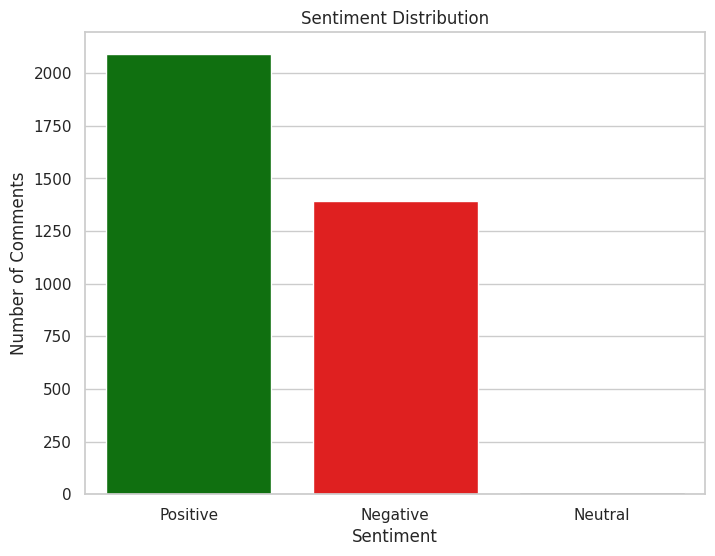

In [ ]:
# Creating a bar chart to compare the total count of positive, negative, and neutral sentiment scores.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sentiment_counts = pd.DataFrame({'Sentiment': ['Positive', 'Negative', 'Neutral'],
                                 'Count': [positive_comments, negative_comments, neutral_comments]})

barplot = sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette=['green', 'red', 'grey'])
barplot.set(xlabel='Sentiment', ylabel='Number of Comments', title='Sentiment Distribution')
plt.show()

In [ ]:
# Checking summary statistics
df.describe()

,Rating,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Sentiment_Scores
count,3575.000000,3515.000000,3515.000000,3476.000000,3476.000000,3575.000000
mean,4.790490,42.639473,-2.164986,40.550399,-1.118816,0.187389
std,3.170323,17.022014,44.576587,18.723619,46.045735,0.772714
min,1.000000,-37.666951,-123.182909,-37.814245,-123.179234,-0.997400
25%,2.000000,41.893320,-0.458780,39.739236,-0.458780,-0.706400
50%,4.000000,46.314475,-0.127765,46.314475,-0.127765,0.526200
75%,8.000000,51.467739,11.048029,51.467739,11.048029,0.930750
max,10.000000,65.011873,151.208285,64.145981,174.550610,0.999200


In [ ]:
# Checking summary statistics on Verified reviews only
verified_mask = df[df['Verified'] == 'Trip Verified']
verified_mask.describe()

,Rating,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Sentiment_Scores
count,1067.000000,1065.000000,1065.000000,1064.000000,1064.000000,1067.000000
mean,4.354264,40.485296,-8.693791,39.488025,-3.638234,0.087055
std,3.250644,19.575821,52.071466,20.381650,50.073698,0.786221
min,1.000000,-34.603716,-123.113952,-37.814245,-123.113952,-0.997400
25%,1.000000,36.721303,-4.250169,35.391861,-3.703582,-0.771800
50%,3.000000,51.154108,-0.127765,49.260872,-0.127765,0.224200
75%,7.000000,51.507446,4.832011,51.507446,9.804078,0.915350
max,10.000000,64.145981,151.208285,64.145981,174.550610,0.999200


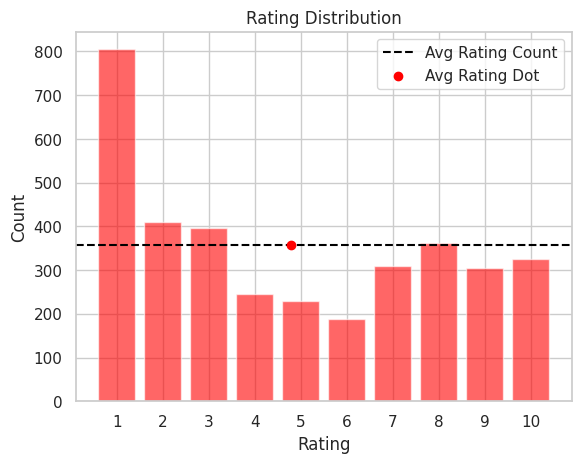

In [ ]:
# Assuming 'df' is your DataFrame
# Checking distribution of Rating counts using a bar chart for visualization
values = df['Rating'].value_counts().sort_index()
plt.bar(values.index, values, align='center', alpha=0.6, color='red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Adding a dashed line to the bar chart to show Average Rating count
avg_count = df['Rating'].value_counts().mean()
plt.axhline(y=avg_count, color='black', linestyle='--', label='Avg Rating Count')

# Adding a dot at the average rating value on the x-axis
avg_rating = df['Rating'].mean()
plt.scatter([avg_rating], [avg_count], color='red', marker='o', label='Avg Rating Dot', zorder=5)  # zorder ensures the dot is on top

# Set x-axis ticks to iterate by 1
plt.xticks(range(int(min(values.index)), int(max(values.index)) + 1))

plt.legend()
plt.show()

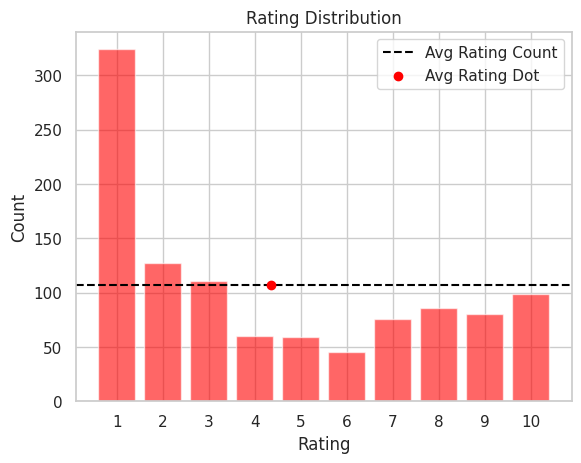

In [ ]:
# Assuming 'df' is your DataFrame
# Checking distribution of 'Rating' counts using a bar chart for visualization
values = verified_mask['Rating'].value_counts().sort_index()
plt.bar(values.index, values, align='center', alpha=0.6, color='red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Adding a dashed line to the bar chart to show Average Rating count
avg_count = verified_mask['Rating'].value_counts().mean()
plt.axhline(y=avg_count, color='black', linestyle='--', label='Avg Rating Count')


# Adding a dot at the average rating value on the x-axis
avg_rating = verified_mask['Rating'].mean()
plt.scatter([avg_rating], [avg_count], color='red', marker='o', label='Avg Rating Dot', zorder=5)  # zorder ensures the dot is on top


# Set x-axis ticks to iterate by 1
plt.xticks(range(int(min(values.index)), int(max(values.index)) + 1))

plt.legend()
plt.show()

### Rating and Sentiment Score Correlation Testing

The rating scale (1-10) provided in this dataset provides the perfect reference point to test the validity of the sentiment score analysis I conducted earlier in this project. Based on my interpretation of the rating scale, I believe that sentiment scores should have correlation with the ratings.

To test this theory, first I grouped each rating and reviewed the average sentiment score at each rating. The results showed that average sentiment scores were trending positive with each increase in rating. Since this result showed there may be some founding to my claim, I created a scatter plot to visualize the distribution of sentiment scores across each rating and included a trend line to compare the results.

The scatter plot results further reinforced my theory that correlation exists between rating and sentiment score. To substantiate this claim, I chose to calculate the correlation coefficient using the Pearson methodology and also calculated the Spearman coefficient to compare results.

#### Null Hypothesis
There is no correlation between customer sentiment and rating.

#### Alternate Hypothesis
There is correlation present between customer sentiment and rating.

#### Testing Results
The results of both correlation coefficient tests were very similar with a correlation coefficient of approximately 0.68 and a p-value of 0.0 for both results. These results confirm that there is sufficient evidence to reject the null hypothesis and accept the alternate hypothesis that there is correlation present between customer sentiment and rating. A correlation coefficient of 0.68 indicates that the correlation is moderate. While the results of this test confirm my theory, it is also important to note that this result is only based on the sample data in this dataset and may not be indicitive of the entire population. Additionally, due to the complexity of human language, natural language processing is still a nuanced topic and the sentiment scores calculated in this dataset may not always be true to the tone of the review.

In [ ]:
# Checking average Sentiment Score per rating.
df.groupby(['Rating'])['Sentiment_Scores'].mean()

Rating
1    -0.454784
2    -0.257600
3    -0.135060
4     0.044920
5     0.266884
6     0.391646
7     0.673534
8     0.813642
9     0.860186
10    0.874427
Name: Sentiment_Scores, dtype: float64

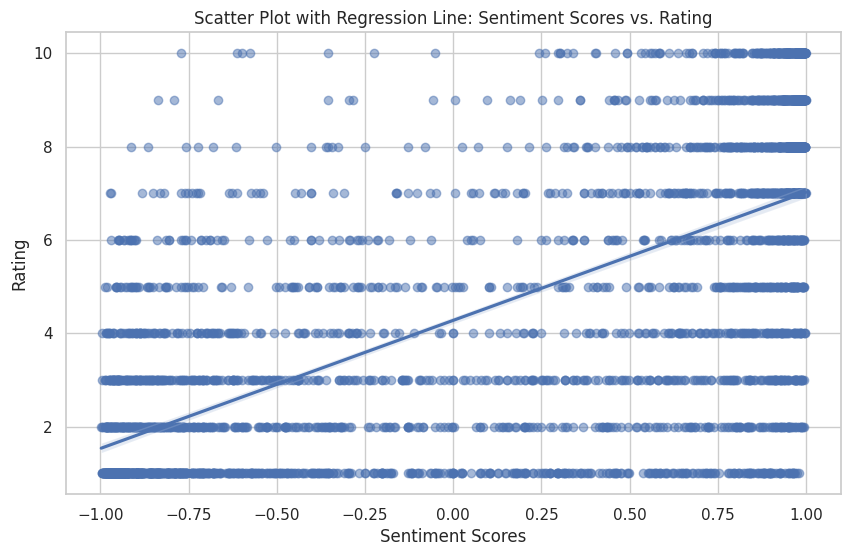

'\nThe output of this scatter plot indicates that there is a positive trend between Rating and Sentiment Scores.\n\nThere also appears to be a lot clustering for negative review scores skewing towards both the positive and \nnegative on the Sentiment Scores axis. This skewing is less apparent when Ratings become more positive.\nThis indicates there may be some biases in the Vader Natural Language Processing package used in this analysis\nor the package has trouble interpreting the tone of the review. \n\nThis may also explain why the average Sentiment Score in this dataset is slightly positive while the average \nRating is negative. \n'

In [ ]:
# Creating a scatter plot to view the Sentiment Score distribution for each Rating with a regression line.
plt.figure(figsize=(10, 6))
sns.regplot(x='Sentiment_Scores', y='Rating', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Sentiment Scores vs. Rating')
plt.xlabel('Sentiment Scores')
plt.ylabel('Rating')
plt.show()

'''
The output of this scatter plot indicates that there is a positive trend between Rating and Sentiment Scores.

There also appears to be a lot clustering for negative review scores skewing towards both the positive and
negative on the Sentiment Scores axis. This skewing is less apparent when Ratings become more positive.
This indicates there may be some biases in the Vader Natural Language Processing package used in this analysis
or the package has trouble interpreting the tone of the review.

This may also explain why the average Sentiment Score in this dataset is slightly positive while the average
Rating is negative.
'''

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Example data (replace with your actual data)
rating_scores = df['Rating']
sentiment_scores = df['Sentiment_Scores']

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(df['Rating'], df['Sentiment_Scores'])

# Calculate Spearman rank correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(df['Rating'], df['Sentiment_Scores'])

# Print the results
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p_value}")
print("\n")
print(f"Spearman Rank Correlation Coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p_value}")

Pearson Correlation Coefficient: 0.6692421498466098
Pearson p-value: 0.0


Spearman Rank Correlation Coefficient: 0.6835690362786957
Spearman p-value: 0.0


#### Exploring Sentiment Across Categories

In [ ]:
# Setting null values to 'Uknown' in 'Class' column for visualization
df['Class'].fillna("Unknown", inplace = True)

# Grouping 'Class' to check mean
class_group = df.groupby('Class')

# Checking mean of each 'Class'
class_group['Sentiment_Scores'].mean()

Class
Business Class     0.257172
Economy Class      0.100962
First Class        0.466353
Premium Economy    0.246089
Unknown           -0.172500
Name: Sentiment_Scores, dtype: float64

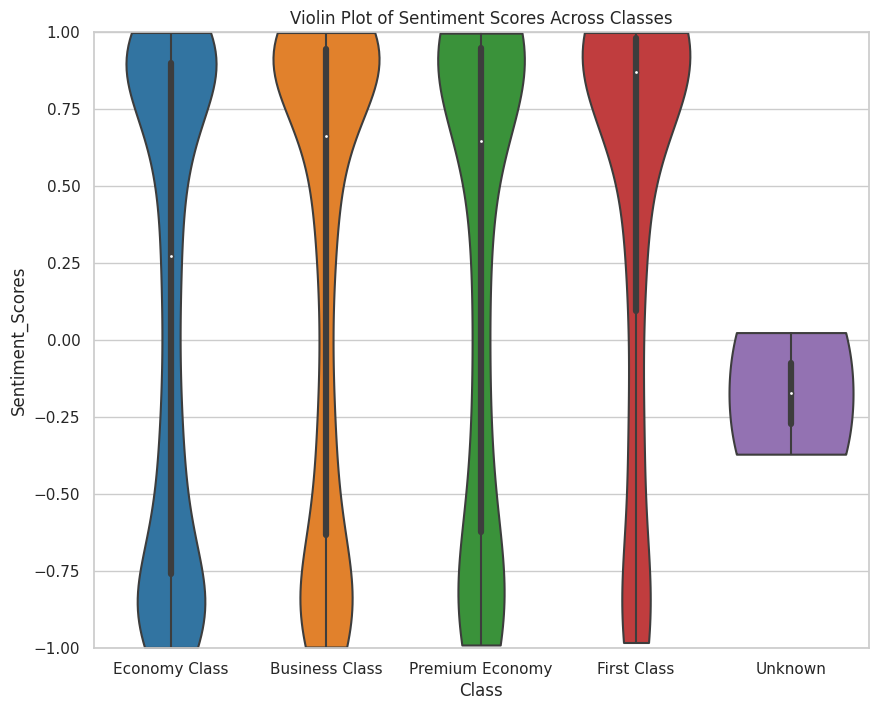

'\nThe output of this chart indicates that there may be a relationship between class and sentiment scores. First Class\nhas the most positive distribution of sentiment while sentiment decreases with each lower tier of class. Economy has\nthe most negative distribution of scores with average sentiment still positive.\n'

In [ ]:
# Creating a violin plot to view the distribution of Sentiment Scores across each class
plt.figure(figsize=(10, 8))
sns.violinplot(x='Class', y='Sentiment_Scores', data=df, palette='tab10', inner='box', cut=0)
plt.ylim(-1, 1)  # Set the desired y-axis limits
plt.title('Violin Plot of Sentiment Scores Across Classes')
plt.show()

'''
The output of this chart indicates that there may be a relationship between class and sentiment scores. First Class
has the most positive distribution of sentiment while sentiment decreases with each lower tier of class. Economy has
the most negative distribution of scores with average sentiment still positive.
'''

In [ ]:
# Setting null values to 'Uknown' in 'Traveller_Type' column for visualization
df['Traveller_Type'].fillna("Unknown", inplace = True)

# Grouping 'Traveller_Type' to check mean
traveller_group = df.groupby('Traveller_Type')

# Checking mean
traveller_group['Sentiment_Scores'].mean()

Traveller_Type
Business          0.021533
Couple Leisure    0.134613
Family Leisure    0.048805
Solo Leisure      0.249426
Unknown           0.390243
Various          -0.980400
Name: Sentiment_Scores, dtype: float64

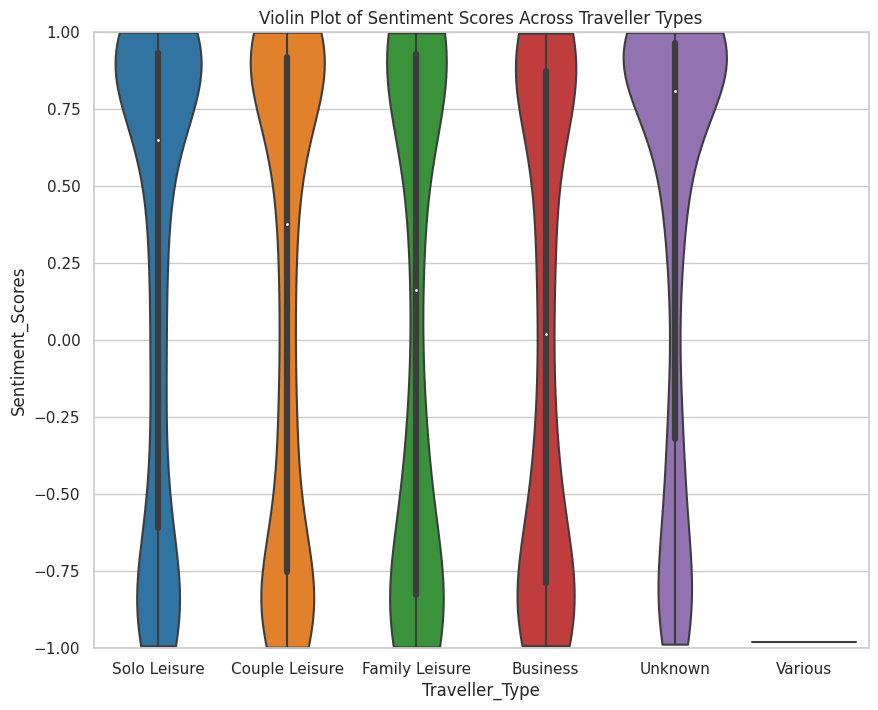

'\nThe output of this chart indicates that there may be a relationship between traveller type and sentiment scores.\nSolo Leisure has the most positive distribution of sentiment while sentiment decreases for Couple Leisure, Family\nLeisure and Business travel respectively.\n'

In [ ]:
# Creating a violin plot to view the distribution of Sentiment Scores across each traveller type
plt.figure(figsize=(10, 8))
sns.violinplot(x='Traveller_Type', y='Sentiment_Scores', data=df, palette='tab10', cut=0)
plt.ylim(-1,1)
plt.title('Violin Plot of Sentiment Scores Across Traveller Types')
plt.show()

'''
The output of this chart indicates that there may be a relationship between traveller type and sentiment scores.
Solo Leisure has the most positive distribution of sentiment while sentiment decreases for Couple Leisure, Family
Leisure and Business travel respectively.
'''

In [ ]:
# Grouping travel dates
date_travel = df.groupby('Flying_Date')

# Checking the averages for each flying date
date_travel['Sentiment_Scores'].mean()

Flying_Date
April 2016        0.166550
April 2017       -0.381933
April 2018       -0.461857
April 2019       -0.124770
April 2020       -0.444233
                    ...   
September 2018   -0.193650
September 2019   -0.313245
September 2020    0.533000
September 2021   -0.488833
September 2022    0.110514
Name: Sentiment_Scores, Length: 100, dtype: float64

### Layover Theory Testing

As I was cleaning the route data into three separate columns for starting location, ending location, and layover route, I began to reflect on my own travel experiences. One negative experience came to mind where I was flying home from FL to NC with a layover in Atlanta, GA. There was bad weather that day which caused my starting flight to get delayed an hour. This delay led to me nearly missing my connection flight and led to me making a mad sprint through the Atlanta airport in the hopes that I could make my flight. When I arrived at the terminal, I discovered that my connection flight was cancelled and I had to find a new flight home! This turned into a 10 hour waiting period until I could finally catch a flight home.

This reflection into my past experiences led me to theorize that flights with a layover will have more negative sentiment than direct flights. To prove whether my theory has any merit, I decided to perform a one-sided 95% confidence test between review samples with a layover and review samples without a layover.  

#### Null Hypothesis
There is no difference in customer sentiment between direct flights and layover flights

#### Alternate Hypothesis
Layover flights have more negative sentiment than direct flights


#### Testing Results
The results of the confidence test confirmed that there is sufficient evidence in this dataset to reject the null hypothesis. This further substantiates my theory that layovers generally lead to more negative sentiment. It is important to note that the samples used in this dataset do not reflect the population as a whole and more testing may be needed to further substantiate this claim. Additionally, it is important to emphasys that while correlation does exist in this dataset sample, this does not prove causation. There may be additional factors leading to this conclusion such as the duration of the layover or the total distance traveled.

In [ ]:
# Importing Library for t testing
from scipy import stats

# Creating dataframes for direct flights and layover flights
layover_df = df[df['Layover_Route'].notnull()]
direct_df = df[df['Layover_Route'].isnull()]

# Assigning variables for the Sentiment Scores
layover_sent = layover_df['Sentiment_Scores']
direct_sent = direct_df['Sentiment_Scores']

# Calculating the mean and std dev for layover flights
layover_mean = layover_sent.mean()
layover_std = layover_sent.std()

# Calculating the mean and std dev for direct flights
direct_mean = direct_sent.mean()
direct_std = direct_sent.std()

alpha = 0.05

# Performing independent one-sided t-test
t_stat, p_value = stats.ttest_ind(layover_sent, direct_sent, alternative='less')

# Printing the p-value in percentage form for better readability
print('p-value: ', round(p_value * 100, 5), '%')

# Checking the p-value against the adjusted significance level for a one-sided test
if p_value < alpha / 2:
    print("Reject the null hypothesis: Layover flights have more negative sentiment than direct flights")
else:
    print("Fail to reject the null hypothesis")

p-value:  0.00255 %
Reject the null hypothesis: Layover flights have more negative sentiment than direct flights


### Insights

Through data exploration, I learned a lot of valuable information that can be used to form a cohesive strategy for British Airways to implement changes that will create value for its patrons. I have broken down some of these insights into a list below for ease of readability.

1. The average rating is negative with a score of 4.8.
2. The average sentiment of reviews is slightly positive at 0.17.
   - This appears to be skewed towards the positive due to the complexity of natural language processing
3. Ratings and customer sentiment have moderate correlation.
4. Customer sentiment is more negative for layover flights than direct flights.
5. Customers in Economy Class have the lowest distribution of sentiment scores while customers traveling in first class have the highest distribution of sentiment scores.
6. Customers traveling for business purposes have the lowest distribution of sentiment scores while customers traveling for solo leisure purposes have the highest distribution of sentiment scores.

By shedding light on these insights, we uncover pain points within the sample customer base, providing a foundation to craft meaningful solutions that enhance the overall experience for all British Airways customers.

## Conclusion

Based on the findings identified in this analysis, it is apparent that British Airways customers represented in this dataset are dissatisfied with the service. While acknowledging that this dataset is a sample and may not fully represent the entire customer population, the data suggests a need for British Airways to explore strategies to enhance customer sentiment and ensure customer retention.

By utilizing sentiment analysis to analyze reviews, I learned that customer sentiment is lowest amongst economy class customers and customers traveling for business purposes. Customer sentiment further decreases for flights that have a layover. Based on these discoveries, the most meaningful impacts will likely come from making improvements to the experience of customers traveling in economy class, customers traveling for business purposes, and customers experiencing layovers. To help guide British Airways on how to begin tackling these pain points, I have outlined some recommendations below.

#### Recommendations for Enhancing Customer Experience

Understanding areas of negative customer sentiment can provide valuable insights for British Airways. With a clear understanding of where problems exist, British Airways can implement several plans to begin to understand why its customers are dissatisfied. One method to accomplish this goal would be sending out both random and targeted surveys that aim to understand the cause of customer dissatisfaction.

Another suggestion for improvement would be to analyze which travel locations are most popular amongst customers. This analysis may reveal opportunities to create direct flight offerings and thus create more value for the customer base. While direct flights may be ideal, these may not always be feasible. In such cases, British Airways could review the most common causes of flight delays to understand if there is any room to improve internal operating procedures and limit preventable delays.

By working to better understand the needs of its customer base and enacting the improvement procedures outlined in this project, British Airways will be able to soar above its competition.

In [ ]:
# Saving the transformed dataset
df.to_csv(r'/kaggle/working/AirlineScrappedReview_Cleaned.csv')

print('The file was saved')

The file was saved
